In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Load dataset
df = pd.read_csv("netflix_titles.csv")  # make sure the file is in your working directory

# Clean and preprocess the dataset
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Fill missing values
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Not Specified')
df['director'] = df['director'].fillna('Not Specified')

# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year and month
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Display first few rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Specified,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0
1,s2,TV Show,Blood & Water,Not Specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0
3,s4,TV Show,Jailbirds New Orleans,Not Specified,Not Specified,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0
4,s5,TV Show,Kota Factory,Not Specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0


1. What is the yearly trend in content added to Netflix?

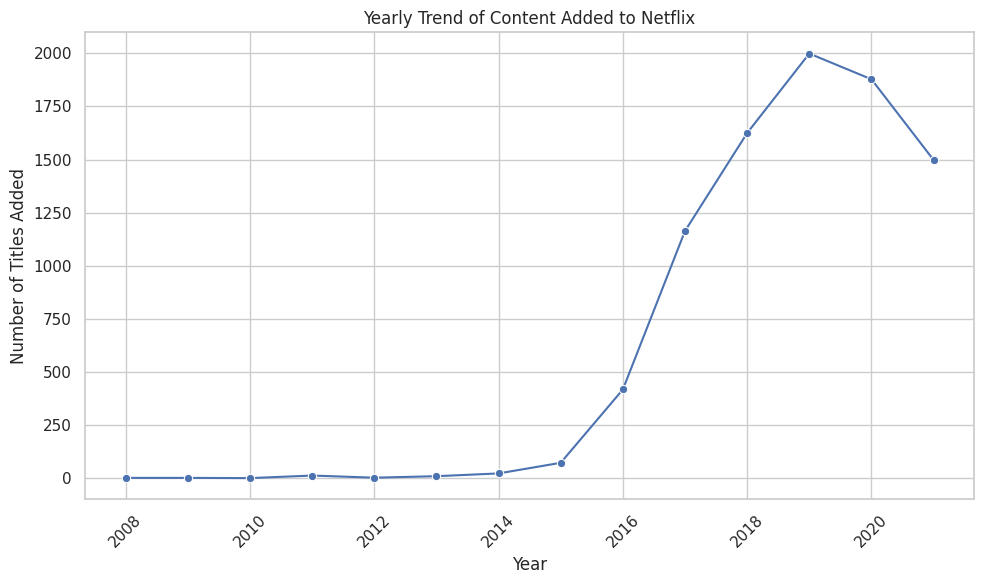

In [ ]:
# Yearly content additions
yearly_counts = df['year_added'].value_counts().sort_index()

plt.figure()
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker="o")
plt.title('Yearly Trend of Content Added to Netflix')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


2. Distribution of Content Types (Movies vs TV Shows)?

/tmp/ipython-input-4-2205612837.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


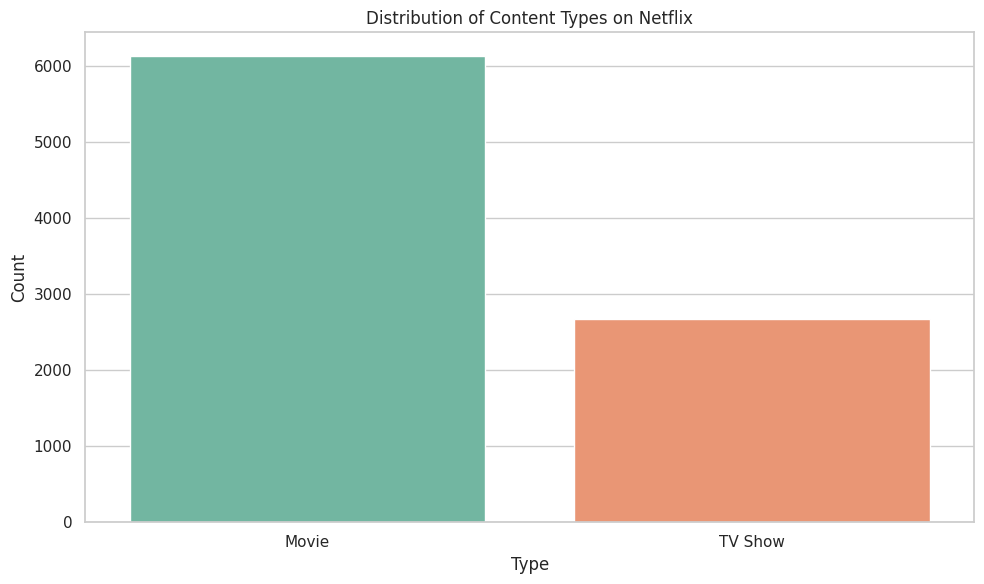

In [ ]:
plt.figure()
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Distribution of Content Types on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


3. Top 10 Countries Contributing Content?

/tmp/ipython-input-5-758270286.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


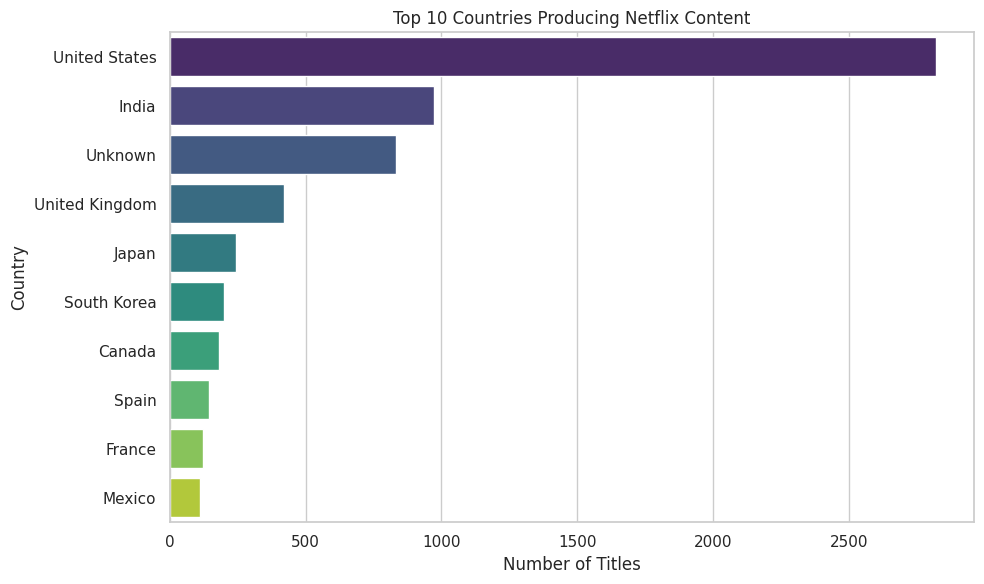

In [ ]:
top_countries = df['country'].value_counts().head(10)

plt.figure()
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


4. Most Common Content Ratings?

/tmp/ipython-input-6-1668217406.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ratings.values, y=top_ratings.index, palette='coolwarm')


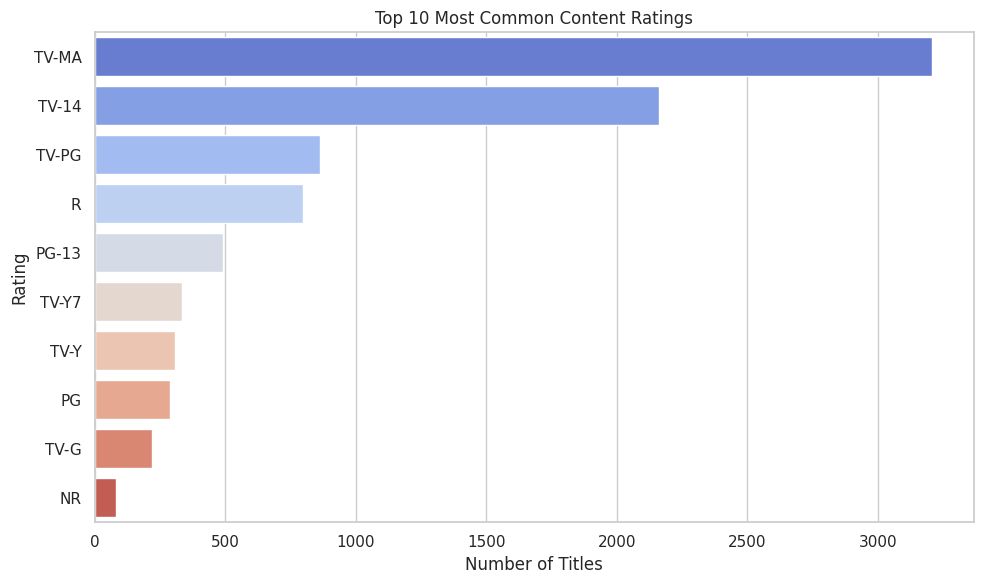

In [ ]:
# Top 10 content ratings
top_ratings = df['rating'].value_counts().head(10)

plt.figure()
sns.barplot(x=top_ratings.values, y=top_ratings.index, palette='coolwarm')
plt.title('Top 10 Most Common Content Ratings')
plt.xlabel('Number of Titles')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()


5. Top 10 Most Frequent Genres?

/tmp/ipython-input-7-3757638004.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genres, y='Genre', x='Count', palette='magma')


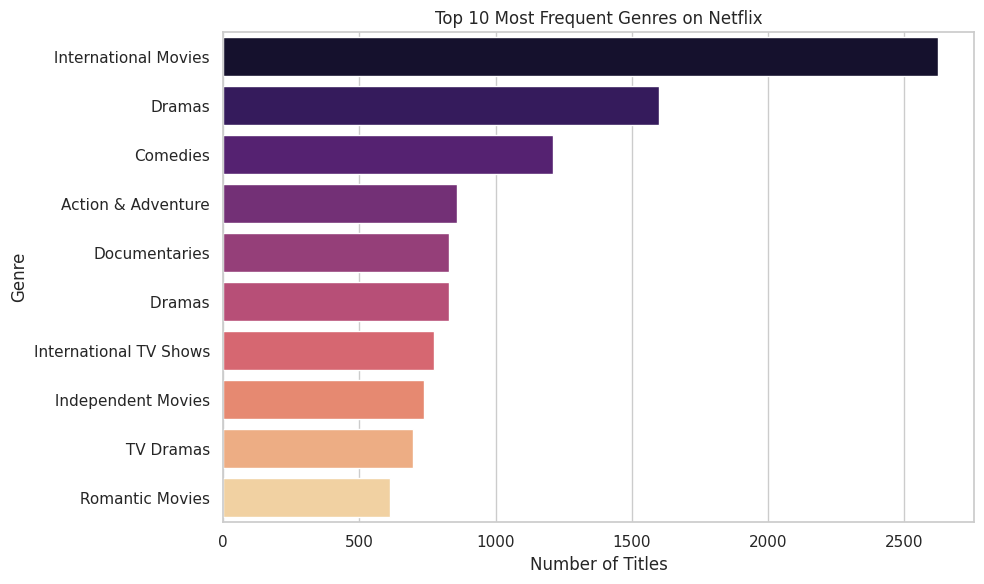

In [ ]:
# Split genres and count top 10
from collections import Counter

genre_counts = Counter()
df['listed_in'].dropna().apply(lambda x: genre_counts.update(x.split(',')))
top_genres = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False).head(10)

plt.figure()
sns.barplot(data=top_genres, y='Genre', x='Count', palette='magma')
plt.title('Top 10 Most Frequent Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


6. Average Duration of Movies?

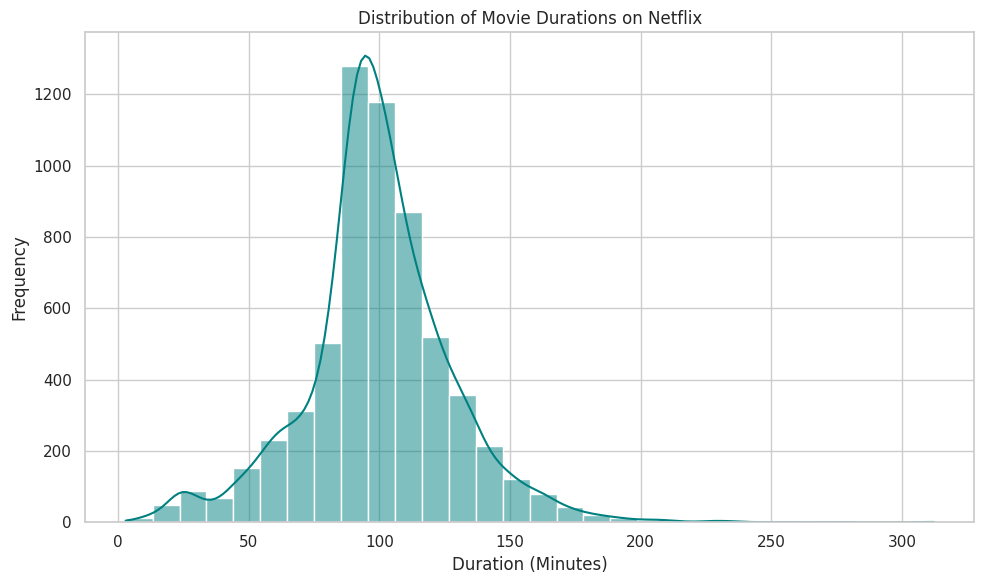

In [ ]:
# Filter only movies
movie_df = df[df['type'] == 'Movie'].copy()

# Extract numeric duration
movie_df['duration_min'] = movie_df['duration'].str.extract('(\d+)').astype(float)

# Plot duration distribution
plt.figure()
sns.histplot(movie_df['duration_min'], bins=30, kde=True, color='teal')
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


7. Most Frequent Directors?

/tmp/ipython-input-9-1736220778.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='plasma')


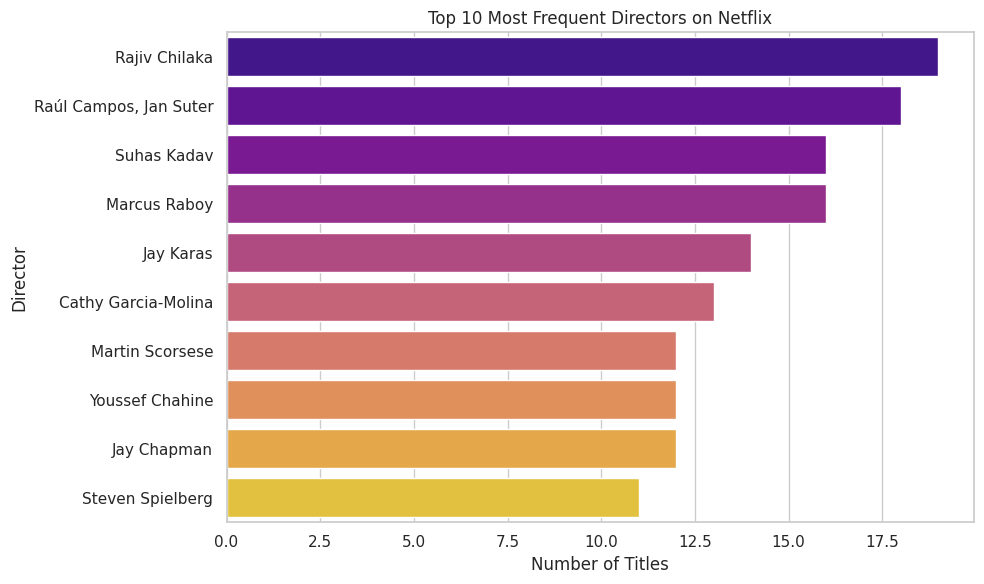

In [ ]:
# Count directors (excluding 'Not Specified')
top_directors = df[df['director'] != 'Not Specified']['director'].value_counts().head(10)

plt.figure()
sns.barplot(x=top_directors.values, y=top_directors.index, palette='plasma')
plt.title('Top 10 Most Frequent Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.tight_layout()
plt.show()


8. Top Actors Appearing on Netflix?

/tmp/ipython-input-10-1802565908.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_actors, y='Actor', x='Count', palette='cubehelix')


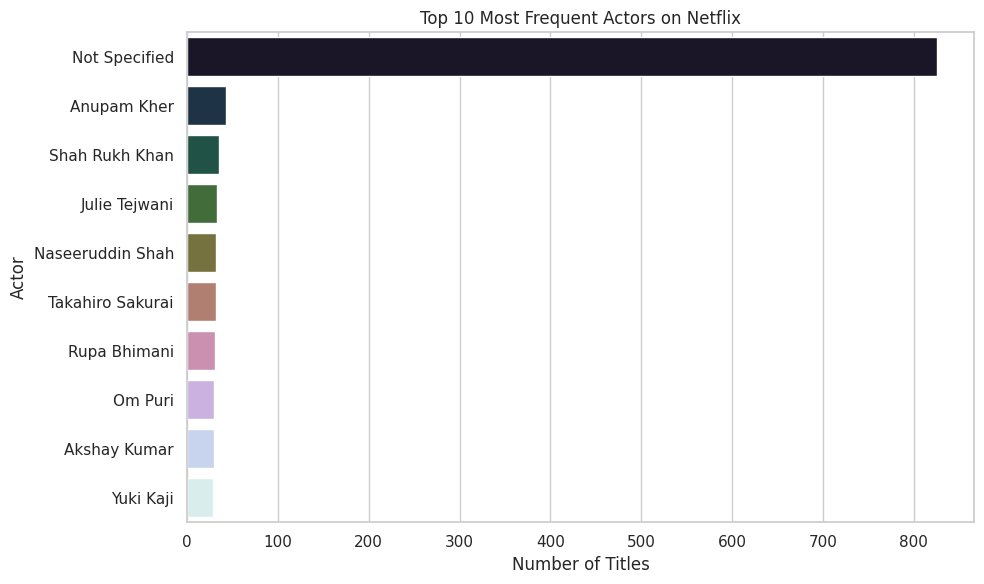

In [ ]:
# Count actors across all titles
from collections import Counter

actor_counter = Counter()
df['cast'].dropna().apply(lambda x: actor_counter.update([i.strip() for i in x.split(',')]))
top_actors = pd.DataFrame(actor_counter.items(), columns=['Actor', 'Count']).sort_values(by='Count', ascending=False).head(10)

plt.figure()
sns.barplot(data=top_actors, y='Actor', x='Count', palette='cubehelix')
plt.title('Top 10 Most Frequent Actors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Actor')
plt.tight_layout()
plt.show()


9, Genre Popularity Over Years?

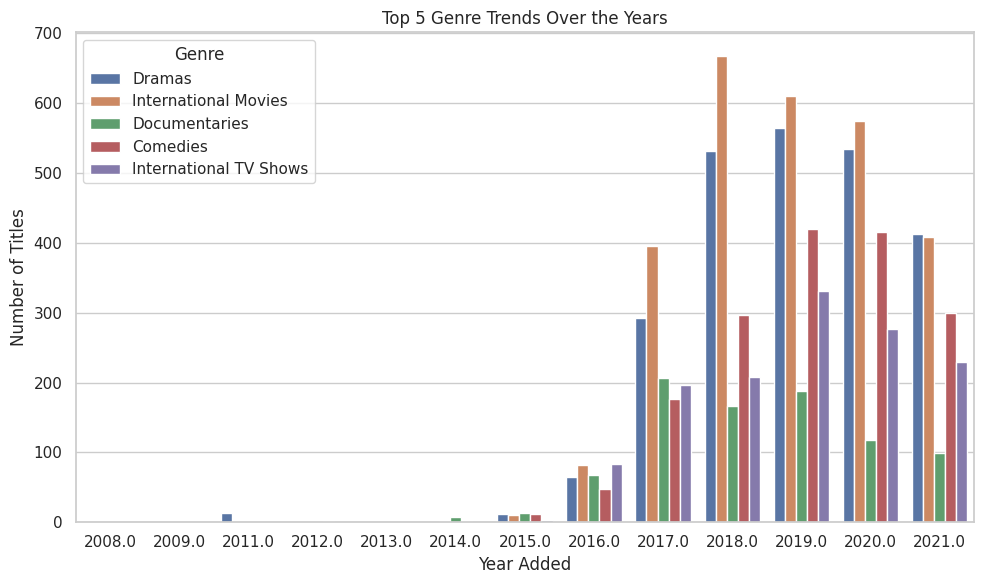

In [ ]:
# Extract and explode genres
df['genres'] = df['listed_in'].str.split(',')
genre_year_df = df[['genres', 'year_added']].dropna()
genre_year_df = genre_year_df.explode('genres')
genre_year_df['genres'] = genre_year_df['genres'].str.strip()

# Filter top 5 genres
top_5_genres = genre_year_df['genres'].value_counts().head(5).index
filtered_genre_year = genre_year_df[genre_year_df['genres'].isin(top_5_genres)]

# Plot genre trend over years
plt.figure()
sns.countplot(data=filtered_genre_year, x='year_added', hue='genres')
plt.title('Top 5 Genre Trends Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.legend(title='Genre')
plt.tight_layout()
plt.show()


10. Monthly Upload Trends?

/tmp/ipython-input-13-1981198217.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_names, y=month_counts.values, palette='pastel')


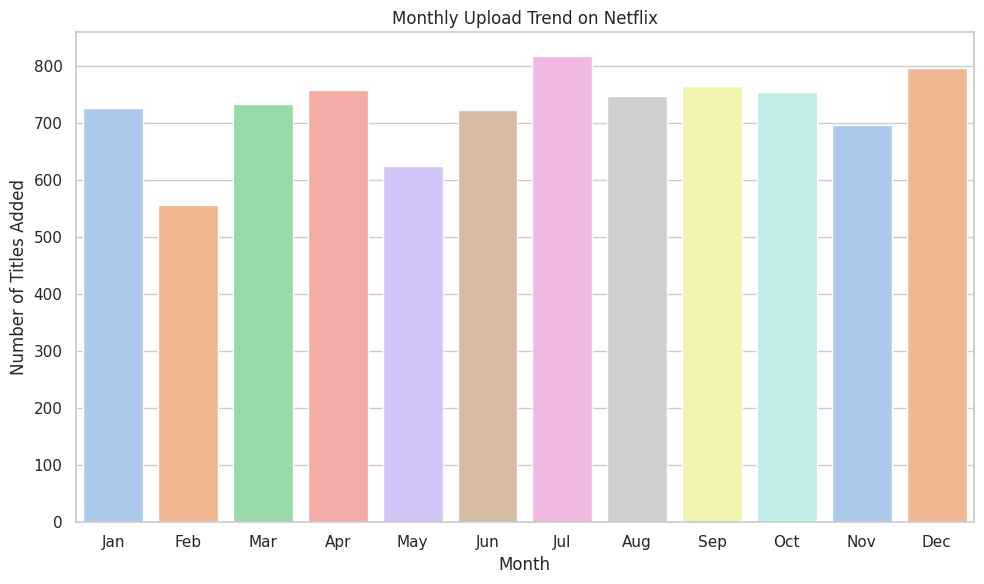

In [ ]:
# Count uploads by month (across all years)
month_counts = df['month_added'].value_counts().sort_index()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure()
sns.barplot(x=month_names, y=month_counts.values, palette='pastel')
plt.title('Monthly Upload Trend on Netflix')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.tight_layout()
plt.show()
